## Twitter Acount "WeRateDogs" Data Analysis
### By Khalid AlRebdi

In [137]:
#Importing all needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
#tweepy to access twitter API
import tweepy
import requests
import json
from PIL import Image
from io import BytesIO

## Data Gathering

> #### 1- Getting WeRateDogs Twitter archive.

In [138]:
#Storing data on tw data frame
tw=pd.read_csv('twitter-archive-enhanced.csv')

In [139]:
tw.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
423,821765923262631936,NaN,NaN,2017-01-18 17:07:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Duchess. She uses dark doggo forces to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/821765923...,13,10,Duchess,doggo,None,None,None
1174,720059472081784833,NaN,NaN,2016-04-13 01:22:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charleson. He lost his plunger. Looked...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/720059472...,9,10,Charleson,None,None,None,None
207,852553447878664193,NaN,NaN,2017-04-13 16:05:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jarod. He likes having his belly brush...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/852553447...,13,10,Jarod,None,None,None,None
748,779377524342161408,NaN,NaN,2016-09-23 17:50:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Have you ever seen such a smol pupper? Portabl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/779377524...,12,10,None,None,None,pupper,None
125,868622495443632128,NaN,NaN,2017-05-28 00:18:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a h*ckin peaceful boy. Unbothered by th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/868622495...,13,10,None,None,None,None,None
1675,682242692827447297,NaN,NaN,2015-12-30 16:51:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Samson. He patrols his waters on the b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682242692...,11,10,Samson,None,None,None,None
2265,667534815156183040,NaN,NaN,2015-11-20 02:47:56 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Frank (pronounced ""Fronq""). Too many b...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/667534815...,8,10,Frank,None,None,None,None
1123,730427201120833536,NaN,NaN,2016-05-11 15:59:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Crystal. She's flawless. Really wants ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/730427201...,11,10,Crystal,None,None,None,None
1738,679527802031484928,NaN,NaN,2015-12-23 05:03:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This little pupper just arrived. 11/10 would s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679527802...,11,10,None,None,None,pupper,None
1248,711363825979756544,NaN,NaN,2016-03-20 01:28:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Please, no puparazzi"" 11/10 https://t.co/nJIX...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/711363825...,11,10,None,None,None,None,None


In [140]:
tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

>
>
> #### 2- Getting Images predictions

In [141]:
#Downloding the images of the prediction file
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
with open('image-predictions.tsv',mode='wb') as file:
    file.write(response.content)

In [142]:
predictions=pd.read_csv('image-predictions.tsv',sep='\t')

In [143]:
predictions.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


>
>
> #### 3- Accessing Twitter (API)

In [144]:
# Replace xxx by your twitter API info
user_key ='xxx'
user_secret ='xxx'
access_token='xxx'
access_secret= 'xxx'
auth= tweepy.OAuthHandler(user_key,user_secret)
auth.set_access_token(access_token,access_secret)
api=tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [145]:
## Storing tweets in the loop
list_of_tweets= []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids=[]
for tweet_id in tw['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

Rate limit reached. Sleeping for: 371
Rate limit reached. Sleeping for: 376


In [146]:
print(list_of_tweets)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [147]:
my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet._json)

In [148]:
#Writing the list into .txt file
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

In [149]:
## creation of a DataFrame from the tweet_json.txt file
my_demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        created_at = each_dictionary['created_at']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        my_demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'url': url,
                             'created_at': created_at,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count', 
                                                       'retweet_count', 'created_at',
                                                       'source', 'retweeted_status', 'url'])

In [150]:
tweet_json.head(10)

,tweet_id,favorite_count,retweet_count,created_at,source,retweeted_status,url
0,892420643555336193,35726,7550,Tue Aug 01 16:23:56 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30871,5598,Tue Aug 01 00:17:27 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,23213,3707,Mon Jul 31 00:18:03 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,39015,7734,Sun Jul 30 15:58:51 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,37270,8335,Sat Jul 29 16:00:24 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
5,891087950875897856,18792,2794,Sat Jul 29 00:08:17 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/xx5cilW0Dd
6,890971913173991426,10918,1816,Fri Jul 28 16:27:12 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/MV01Q820LT
7,890729181411237888,60205,16897,Fri Jul 28 00:22:40 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/hrcFOGi12V
8,890609185150312448,25849,3850,Thu Jul 27 16:25:51 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/UkrdQyoYxV
9,890240255349198849,29510,6573,Wed Jul 26 15:59:51 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/l3TSS3o2M0


In [151]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 7 columns):
tweet_id            2331 non-null object
favorite_count      2331 non-null int64
retweet_count       2331 non-null int64
created_at          2331 non-null object
source              2331 non-null object
retweeted_status    2331 non-null object
url                 2331 non-null object
dtypes: int64(2), object(5)
memory usage: 127.6+ KB


## Data Assessment

>
>
>  Assessing data for data quality and tidness issues.


> 
>
> 1- twitter-archive WeRateDogs


#### Visual assessment

In [152]:
tw.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
844,766693177336135680,NaN,NaN,2016-08-19 17:47:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brudge. He's a Doberdog. Going to be h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/766693177...,11,10,Brudge,None,None,None,None
1754,678798276842360832,NaN,NaN,2015-12-21 04:44:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Linda. She fucking hates trees. 7/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678798276...,7,10,Linda,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
394,825829644528148480,NaN,NaN,2017-01-29 22:15:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Toby. He just found out you only prete...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825829644...,12,10,Toby,None,None,None,None
839,767191397493538821,NaN,NaN,2016-08-21 02:47:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I don't know any of the backstory behind this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/767191397...,13,10,None,doggo,None,None,None
1058,741793263812808706,NaN,NaN,2016-06-12 00:44:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When your crush won't pay attention to you. Bo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741793263...,10,10,None,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
1076,739606147276148736,NaN,NaN,2016-06-05 23:53:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Benji. He just turned 1. Has already give...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739606147...,9,10,Benji,None,None,pupper,None
2120,670411370698022913,NaN,NaN,2015-11-28 01:18:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Scooter. He's ready for his first day of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670411370...,12,10,Scooter,None,None,None,None
969,750132105863102464,NaN,NaN,2016-07-05 01:00:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stewie. He will roundhouse kick anyone...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750132105...,11,10,Stewie,None,None,None,None


In [224]:
tw.info()
print("-----------------------------------------")
print("-----------------------------------------")
tw.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### Programmatic assessment

In [222]:
print("Number of duplicated records: ")
sum(tw.duplicated())

Number of duplicated records: 


0

In [223]:
print("Null values per column: ")
tw.isnull().sum()

Null values per column: 


tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [154]:
#count of how many the rating has occured.
tw.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

>
>
> 2- Images-Prediction

#### Visual assessment

In [155]:
predictions.sample(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1338,758467244762497024,https://pbs.twimg.com/ext_tw_video_thumb/75846...,1,Labrador_retriever,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True
113,667915453470232577,https://pbs.twimg.com/media/CUTpj-GWcAATc6A.jpg,1,leatherback_turtle,0.452517,False,boxer,0.196655,True,terrapin,0.160983,False
223,670303360680108032,https://pbs.twimg.com/media/CU1lWFaVAAAl0HG.jpg,1,Shetland_sheepdog,0.380278,True,Cardigan,0.342806,True,guinea_pig,0.156249,False
1987,872620804844003328,https://pbs.twimg.com/media/DBwr_hzXkAEnZBW.jpg,1,cocker_spaniel,0.513191,True,Sussex_spaniel,0.159088,True,standard_poodle,0.149509,True
1892,849336543269576704,https://pbs.twimg.com/media/C8lzFC4XcAAQxB4.jpg,1,patio,0.521788,False,prison,0.149544,False,restaurant,0.027153,False
1106,723179728551723008,https://pbs.twimg.com/media/CglAHjAUgAAfxcq.jpg,1,tennis_ball,0.176495,False,badger,0.059905,False,Norwegian_elkhound,0.056850,True
633,680970795137544192,https://pbs.twimg.com/media/CXNLU6wWkAE0OkJ.jpg,1,pug,0.713102,True,whippet,0.057426,True,quilt,0.056018,False
441,674468880899788800,https://pbs.twimg.com/media/CVwx3dQXAAA0ksL.jpg,2,chow,0.526230,True,Pomeranian,0.283647,True,toy_poodle,0.067665,True
1990,873213775632977920,https://pbs.twimg.com/media/DB5HTBGXUAE0TiK.jpg,1,vizsla,0.619782,True,bloodhound,0.338069,True,Chesapeake_Bay_retriever,0.012676,True
1527,788908386943430656,https://pbs.twimg.com/media/CvLD-mbWYAAFI8w.jpg,1,remote_control,0.881538,False,oscilloscope,0.035513,False,golden_retriever,0.034090,True


In [156]:
predictions.info()
print("-----------------------------------------")
print("-----------------------------------------")
predictions.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
-----------------------------------------
-----------------------------------------


,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### Programmatic assessment

In [157]:
print("Number of duplicated records: ")
sum(predictions.jpg_url.duplicated())

Number of duplicated records: 


66

In [158]:
print("Null values per column: ")
predictions.isnull().sum()


Null values per column: 


tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [159]:
predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [160]:
predictions.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

>
>
> 3- Tweets-Json

#### Visual assessment

In [161]:
tweet_json.sample(50)

,tweet_id,favorite_count,retweet_count,created_at,source,retweeted_status,url
508,809084759137812480,13327,3553,Wed Dec 14 17:16:53 +0000 2016,Twitter for iPhone,Original tweet,https://t.co/ySn6zB6mwQ
1414,696900204696625153,3113,1002,Tue Feb 09 03:35:31 +0000 2016,Twitter for iPhone,Original tweet,https://t.co/NKuON5Al8i
604,796080075804475393,8526,2319,Tue Nov 08 20:00:55 +0000 2016,Twitter for iPhone,Original tweet,https://t.co/opoXKxmfFm
1360,700796979434098688,2398,917,Fri Feb 19 21:39:54 +0000 2016,Twitter for iPhone,Original tweet,https://t.co/5XaR0kj8cr
102,871879754684805121,35046,9926,Tue Jun 06 00:01:46 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/vgvqHeVsE0
1488,691321916024623104,2526,644,Sun Jan 24 18:09:23 +0000 2016,Twitter for iPhone,Original tweet,https://t.co/g4fiS8A9Ab
795,770787852854652928,4909,1195,Wed Aug 31 00:58:39 +0000 2016,Twitter for iPhone,Original tweet,https://t.co/d0QEbp78Yi
1165,718246886998687744,1866,485,Fri Apr 08 01:19:36 +0000 2016,Twitter for iPhone,Original tweet,https://t.co/FmxOpf2Sgl
2080,670474236058800128,1424,693,Sat Nov 28 05:28:09 +0000 2015,Twitter for iPhone,Original tweet,https://t.co/7JMAHdJ6A4
684,786036967502913536,0,7025,Wed Oct 12 02:53:11 +0000 2016,Twitter for iPhone,This is a retweet,This is a retweet


In [162]:
tweet_json.info()
print("-----------------------------------------")
print("-----------------------------------------")
tweet_json.describe()
print("-----------------------------------------")
print("-----------------------------------------")
print("Number of duplicated records: ")
sum(tweet_json.duplicated())
print("-----------------------------------------")
print("-----------------------------------------")
print("Null values per column: ")
tweet_json.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 7 columns):
tweet_id            2331 non-null object
favorite_count      2331 non-null int64
retweet_count       2331 non-null int64
created_at          2331 non-null object
source              2331 non-null object
retweeted_status    2331 non-null object
url                 2331 non-null object
dtypes: int64(2), object(5)
memory usage: 127.6+ KB
-----------------------------------------
-----------------------------------------
-----------------------------------------
-----------------------------------------
Number of duplicated records: 
-----------------------------------------
-----------------------------------------
Null values per column: 


tweet_id            0
favorite_count      0
retweet_count       0
created_at          0
source              0
retweeted_status    0
url                 0
dtype: int64

#### Programmatic assessment

In [163]:
#10 most retweeted tweets
tweet_json.sort_values(['retweet_count'],ascending= 0)[0:10]

,tweet_id,favorite_count,retweet_count,created_at,source,retweeted_status,url
1015,744234799360020481,154005,76296,Sat Jun 18 18:26:18 +0000 2016,Twitter for iPhone,Original tweet,https://t.co/7wE9LTEXC4
1055,739238157791694849,113840,56742,Sat Jun 04 23:31:25 +0000 2016,Twitter for iPhone,Original tweet,https://t.co/YcXgHfp1EC
517,807106840509214720,118948,55619,Fri Dec 09 06:17:20 +0000 2016,Twitter for iPhone,Original tweet,https://t.co/DkBYaCAg2d
397,822872901745569793,131342,42995,Sat Jan 21 18:26:02 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/nTz3FtorBc
65,879415818425184262,98079,39988,Mon Jun 26 19:07:24 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/UDT7ZkcTgY
433,819004803107983360,87071,36829,Wed Jan 11 02:15:36 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/AdPKrI8BZ1
430,819015337530290176,0,36829,Wed Jan 11 02:57:27 +0000 2017,Twitter for iPhone,This is a retweet,This is a retweet
520,806629075125202948,75142,34800,Wed Dec 07 22:38:52 +0000 2016,Twitter for iPhone,Original tweet,https://t.co/f1h2Fsalv9
129,866450705531457537,115025,32404,Mon May 22 00:28:40 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/wk7TfysWHr
1741,678399652199309312,78093,30849,Sun Dec 20 02:20:55 +0000 2015,Twitter for iPhone,Original tweet,https://t.co/VRTbo3aAcm


In [164]:
#10 most Favourate(Like) tweets
tweet_json.sort_values(['favorite_count'],ascending=0)[0:10]

,tweet_id,favorite_count,retweet_count,created_at,source,retweeted_status,url
1015,744234799360020481,154005,76296,Sat Jun 18 18:26:18 +0000 2016,Twitter for iPhone,Original tweet,https://t.co/7wE9LTEXC4
397,822872901745569793,131342,42995,Sat Jan 21 18:26:02 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/nTz3FtorBc
517,807106840509214720,118948,55619,Fri Dec 09 06:17:20 +0000 2016,Twitter for iPhone,Original tweet,https://t.co/DkBYaCAg2d
129,866450705531457537,115025,32404,Mon May 22 00:28:40 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/wk7TfysWHr
1055,739238157791694849,113840,56742,Sat Jun 04 23:31:25 +0000 2016,Twitter for iPhone,Original tweet,https://t.co/YcXgHfp1EC
65,879415818425184262,98079,39988,Mon Jun 26 19:07:24 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/UDT7ZkcTgY
433,819004803107983360,87071,36829,Wed Jan 11 02:15:36 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/AdPKrI8BZ1
162,859196978902773760,85421,28169,Tue May 02 00:04:57 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/r6huxnDPOZ
1741,678399652199309312,78093,30849,Sun Dec 20 02:20:55 +0000 2015,Twitter for iPhone,Original tweet,https://t.co/VRTbo3aAcm
111,870374049280663552,77737,24187,Thu Jun 01 20:18:38 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/6SWu4xkvDk


## Cleaning data

### Data tidiness issues

> 1- The dog stage is dstributed across 4 different attributes:
> (doggo, floofer, pupper, puppo)

> 2- We need to join the three Dataframes together (tw - images prediction - Json tweets).

### Data Quality issues

In [165]:
#Copying before cleaning as a better practise
tw_clean =tw.copy()
predictions_clean= predictions.copy()
json_clean =tweet_json.copy()

### Cleaning tidiness

> 1- The dog stage is dstributed across 4 different attributes:
> (doggo, floofer, pupper, puppo)

###### Code

In [166]:
stage1= ['doggo','pupper','floofer','puppo' ]
for i in stage1:
        tw_clean[i] = tw_clean[i].replace('None', '')

In [167]:
# use cat to combine 
tw_clean['stage1'] = tw_clean.doggo.str.cat(tw_clean.floofer).str.cat(tw_clean.pupper).str.cat(tw_clean.puppo)
# drop the four old colomns
tw_clean = tw_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)
# use np.nan to fill the empty
tw_clean['stage1'] = tw_clean['stage1'].replace('', np.nan)

###### Test

In [168]:
tw_clean.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage1
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


> 2- We need to join the three Dataframes together (tw - images prediction - Json tweets).

###### Code

In [169]:
#Change tweet_id to type int64 in order to merge with the other 2 tables
json_clean['tweet_id']= pd.to_numeric(json_clean['tweet_id'])
json_clean['tweet_id'].dtypes

dtype('int64')

In [170]:
twitter_df = pd.merge(tw_clean, 
                      predictions_clean, 
                      how = 'left', on = ['tweet_id'])
#Keeping rows that must contain images
twitter_df=twitter_df[twitter_df['jpg_url'].notnull()]

In [171]:
twitter_all = pd.merge(twitter_df,json_clean, 
                      how = 'left', on = ['tweet_id'])

###### Test

In [172]:
twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p3,p3_conf,p3_dog,favorite_count,retweet_count,created_at,source_y,retweeted_status,url,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,banana,0.076110,False,35727.0,7550.0,Tue Aug 01 16:23:56 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,papillon,0.068957,True,30872.0,5599.0,Tue Aug 01 00:17:27 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,kelpie,0.031379,True,23213.0,3707.0,Mon Jul 31 00:18:03 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,spatula,0.040836,False,39015.0,7735.0,Sun Jul 30 15:58:51 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,German_short-haired_pointer,0.175219,True,37270.0,8335.0,Sat Jul 29 16:00:24 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3,NaN


In [173]:
twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,2.075000e+03,2.300000e+01,2.300000e+01,8.100000e+01,8.100000e+01,2075.000000,2075.000000,2075.000000,2075.000000,2.075000e+03,2.075000e+03,2059.000000,2059.000000
mean,7.384514e+17,6.978112e+17,4.196984e+09,7.678895e+17,9.721754e+15,12.266024,10.511325,1.203855,0.594548,1.345886e-01,6.032417e-02,7880.587664,2538.626032
std,6.785203e+16,4.359384e+16,0.000000e+00,5.962520e+16,8.749575e+16,40.680299,7.177072,0.561875,0.271174,1.006657e-01,5.090593e-02,11908.065336,4434.586725
min,6.660209e+17,6.671522e+17,4.196984e+09,6.675094e+17,7.832140e+05,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,11.000000
25%,6.764835e+17,6.732411e+17,4.196984e+09,7.128090e+17,4.196984e+09,10.000000,10.000000,1.000000,0.364412,5.388625e-02,1.622240e-02,1496.500000,543.500000
50%,7.119988e+17,6.757073e+17,4.196984e+09,7.798343e+17,4.196984e+09,11.000000,10.000000,1.000000,0.588230,1.181810e-01,4.944380e-02,3476.000000,1199.000000
75%,7.932034e+17,7.031489e+17,4.196984e+09,8.071068e+17,4.196984e+09,12.000000,10.000000,1.000000,0.843855,1.955655e-01,9.180755e-02,9822.000000,2917.500000
max,8.924206e+17,8.558181e+17,4.196984e+09,8.874740e+17,7.874618e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,154011.000000,76301.000000


### Cleaning Quality Issues

> 1- timestamp is not a datetime format.

In [174]:
#Code
tw_clean['timestamp'] = pd.to_datetime(tw_clean['timestamp'])

In [175]:
#Test 
tw_clean.timestamp.dtypes

datetime64[ns, UTC]

> 2- Some of the tweet_ids have the same jpg_url (dupplication).

###### Code

In [176]:
predictions_clean=predictions_clean.drop_duplicates(subset=['jpg_url'],keep='first')

###### Test

In [177]:
sum(predictions_clean['jpg_url'].duplicated())

0

> 3- tweet_id should be object instead of int because there is no need for calculation.

###### Code

In [178]:
tw_clean['tweet_id'] = tw_clean['tweet_id'].astype('str')

###### Test

In [179]:
tw_clean['tweet_id'].dtype

dtype('O')

In [180]:
tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
stage1                        380 non-null object
dtypes: datetime64[ns, UTC](1), float64(4), int64(2), object(7)
memory usage: 257.8+ KB


>  4- The first name of the dog should be capital letter.

###### Code

In [181]:
tw_clean['name'].str.islower().sum()

109

In [182]:
tw_clean['name']=tw_clean.name.str.capitalize()

###### Test

In [183]:
tw_clean['name'].str.islower().sum()

0

> 5- dropping unnecessary columns to our work.

###### Code

In [184]:
tw_clean.sample(7)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage1
1987,672877615439593473,NaN,NaN,2015-12-04 20:38:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Oscar. He's getting bombarded with the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672877615...,8,10,Oscar,NaN
162,860524505164394496,NaN,NaN,2017-05-05 16:00:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Carl. He likes to dance. Doesn't care ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/860524505...,13,10,Carl,NaN
1785,677644091929329666,NaN,NaN,2015-12-18 00:18:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a dog swinging. I really enjoyed it so...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677644091...,11,10,A,NaN
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,NaN
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,NaN
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,NaN
1146,727155742655025152,NaN,NaN,2016-05-02 15:20:13+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",When you're trying to enjoy yourself but end u...,NaN,NaN,NaN,https://vine.co/v/ixa1ejbXiM7,11,10,None,NaN


In [185]:
tw_clean = tw_clean.drop('retweeted_status_id', 1)
tw_clean = tw_clean.drop('retweeted_status_user_id', 1)
tw_clean = tw_clean.drop('retweeted_status_timestamp', 1)

###### Test

In [186]:
tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2356 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2356 non-null datetime64[ns, UTC]
source                   2356 non-null object
text                     2356 non-null object
expanded_urls            2297 non-null object
rating_numerator         2356 non-null int64
rating_denominator       2356 non-null int64
name                     2356 non-null object
stage1                   380 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(6)
memory usage: 202.5+ KB


>  6-Removing Retweets are duplicates from actual tweets.

###### Code

In [187]:
tw_clean =tw_clean.loc[tw_clean['text'].str.startswith('RT')==False]

###### Test

In [188]:
tw_clean['text'].str.startswith('RT').sum()

0

> 7- Dropping unncessary columns in the tweet_json data frame.

###### Code

In [189]:
json_clean.head(10)

,tweet_id,favorite_count,retweet_count,created_at,source,retweeted_status,url
0,892420643555336193,35726,7550,Tue Aug 01 16:23:56 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30871,5598,Tue Aug 01 00:17:27 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,23213,3707,Mon Jul 31 00:18:03 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,39015,7734,Sun Jul 30 15:58:51 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,37270,8335,Sat Jul 29 16:00:24 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
5,891087950875897856,18792,2794,Sat Jul 29 00:08:17 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/xx5cilW0Dd
6,890971913173991426,10918,1816,Fri Jul 28 16:27:12 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/MV01Q820LT
7,890729181411237888,60205,16897,Fri Jul 28 00:22:40 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/hrcFOGi12V
8,890609185150312448,25849,3850,Thu Jul 27 16:25:51 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/UkrdQyoYxV
9,890240255349198849,29510,6573,Wed Jul 26 15:59:51 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/l3TSS3o2M0


In [190]:
json_clean= json_clean.drop(['created_at','retweeted_status','url'],1)

###### Test

In [191]:
json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
tweet_id          2331 non-null int64
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
source            2331 non-null object
dtypes: int64(3), object(1)
memory usage: 72.9+ KB


> 8- Renaming columns of Images Prediction to clear and understandable names.

###### Code

In [192]:
predictions_clean.rename(columns={'p1':'prediction1'}, inplace = True)
predictions_clean.rename(columns={'p1_conf': 'confidence1'}, inplace = True)
predictions_clean.rename(columns={'p1_dog':'firstDog'}, inplace = True)
predictions_clean.rename(columns={'p2': 'prediction2'}, inplace = True)
predictions_clean.rename(columns={'p2_conf': 'confidence2'}, inplace = True)
predictions_clean.rename(columns={'p2_dog': 'SecondDog'}, inplace = True)
predictions_clean.rename(columns={'p3': 'prediction3'}, inplace = True)
predictions_clean.rename(columns={'p3_conf': 'confidence3'}, inplace = True)
predictions_clean.rename(columns={'p3_dog':'ThirdDog'}, inplace = True)


###### Test

In [193]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id       2009 non-null int64
jpg_url        2009 non-null object
img_num        2009 non-null int64
prediction1    2009 non-null object
confidence1    2009 non-null float64
firstDog       2009 non-null bool
prediction2    2009 non-null object
confidence2    2009 non-null float64
SecondDog      2009 non-null bool
prediction3    2009 non-null object
confidence3    2009 non-null float64
ThirdDog       2009 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


## Storing Data

In [195]:
predictions_clean['tweet_id'] = predictions_clean['tweet_id'].astype('str')

In [196]:
twitter_a = pd.merge(tw_clean, 
                      predictions_clean, 
                      how = 'left', on = ['tweet_id'])
#Keeping rows that must contain images
twitter_a=twitter_a[twitter_a['jpg_url'].notnull()]

In [198]:
json_clean['tweet_id'] = json_clean['tweet_id'].astype('str')

In [199]:
twitter= pd.merge(twitter_a,json_clean, 
                      how = 'left', on = ['tweet_id'])

In [200]:
#Storing the cleaned data in a csv file format
twitter.to_csv('twitter_archive_master.csv',index=False,encoding ='utf-8')

In [202]:
twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,...,firstDog,prediction2,confidence2,SecondDog,prediction3,confidence3,ThirdDog,favorite_count,retweet_count,source_y
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,False,bagel,0.085851,False,banana,0.076110,False,35726.0,7550.0,Twitter for iPhone
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,True,Pekinese,0.090647,True,papillon,0.068957,True,30871.0,5598.0,Twitter for iPhone
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,True,malamute,0.078253,True,kelpie,0.031379,True,23213.0,3707.0,Twitter for iPhone
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,39015.0,7734.0,Twitter for iPhone
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,37270.0,8335.0,Twitter for iPhone


In [206]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 25 columns):
tweet_id                 1993 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1993 non-null datetime64[ns, UTC]
source_x                 1993 non-null object
text                     1993 non-null object
expanded_urls            1993 non-null object
rating_numerator         1993 non-null int64
rating_denominator       1993 non-null int64
name                     1993 non-null object
stage1                   306 non-null object
jpg_url                  1993 non-null object
img_num                  1993 non-null float64
prediction1              1993 non-null object
confidence1              1993 non-null float64
firstDog                 1993 non-null object
prediction2              1993 non-null object
confidence2              1993 non-null float64
SecondDog                1993 non-null object
predicti

## Data Visulization 

### Most Popular Dog Types

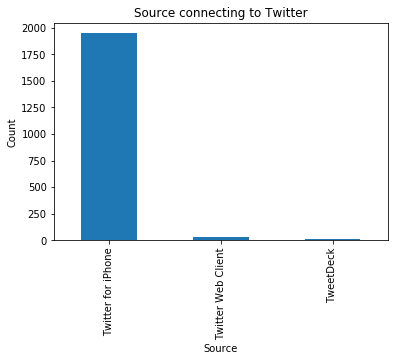

In [203]:
fig, ax = plt.subplots()
twitter['source_y'].value_counts().plot(kind='bar')
plt.xlabel('Source')
plt.ylabel('Count')
plt.title('Source of twitter connection');

> Clearly the Twitter for IPhone is main source of WeRateDogs.

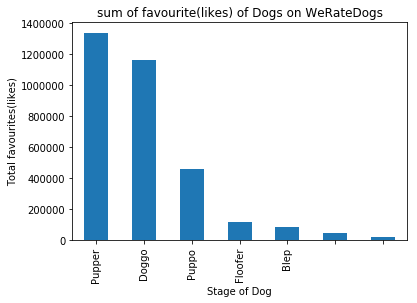

In [211]:
labels = ['Pupper','Doggo','Puppo','Floofer','Blep']
fig, ax = plt.subplots()
twitter.groupby(['stage1']).favorite_count.sum().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Stage of Dog')
ax.set_xticklabels(labels)
plt.ylabel('Total favourites(likes)')
plt.title('sum of favourite(likes) Stage of Dogs on WeRateDogs');

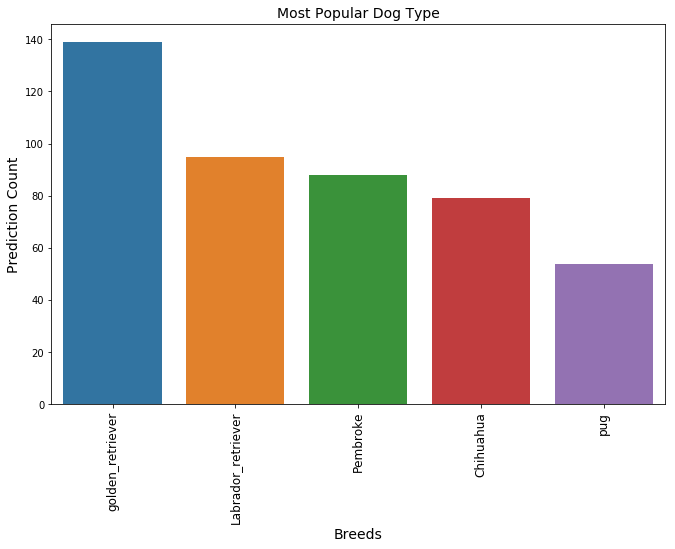

In [209]:
plt.figure(figsize=(11,7))
ax = sb.barplot(x = twitter['prediction1'].value_counts()[0:5].index,
            y =twitter['prediction1'].value_counts()[0:5],
            data = twitter);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 12);
plt.xlabel("Breeds",fontsize = 14);
plt.ylabel("Prediction Count",fontsize = 14);
plt.title("Most Popular Dog Type",fontsize = 14);

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


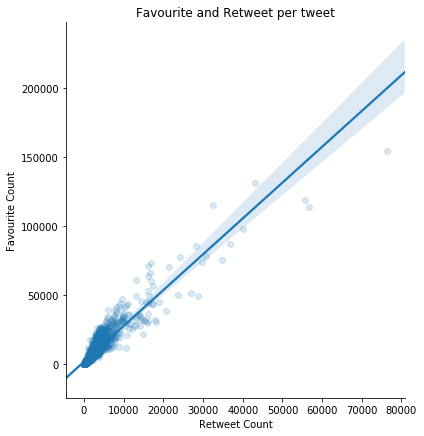

In [220]:
sb.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=twitter,
           size = 6,
           aspect=1,
           scatter_kws={'alpha':1/6})
plt.title('Favourite and Retweet per tweet')
plt.xlabel('Retweet Count')
plt.ylabel('Favourite Count');